In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl   # mpl.style.available
mpl.style.use('ggplot')
from sklearn.metrics import roc_curve, auc

data=pd.read_csv('C:/Users/BF/Desktop/scoreCard/dashu_realtarget.csv')

data.head()

,a.mid_long,b.target
0,777,0
1,760,0
2,810,1
3,614,1
4,770,0


In [2]:
data.rename(columns = {'a.mid_long':'score',
                       'b.target':'target'}, inplace=True)

data.head()

,score,target
0,777,0
1,760,0
2,810,1
3,614,1
4,770,0


ks_value is 0.1068 at pop = 0.1801


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,tile,cumsum_good,cumsum_bad,ks
0,0.000000,0.000000,0.000000,0.000000
1,0.020061,0.008897,0.043809,0.034912
2,0.040074,0.024483,0.073238,0.048755
3,0.060088,0.039089,0.104753,0.065664
4,0.080053,0.055061,0.133214,0.078153
5,0.100067,0.073800,0.155938,0.082138
6,0.120080,0.091068,0.181791,0.090723
7,0.140046,0.107496,0.209283,0.101788
8,0.160059,0.126550,0.231337,0.104787
9,0.180072,0.145919,0.252719,0.106800


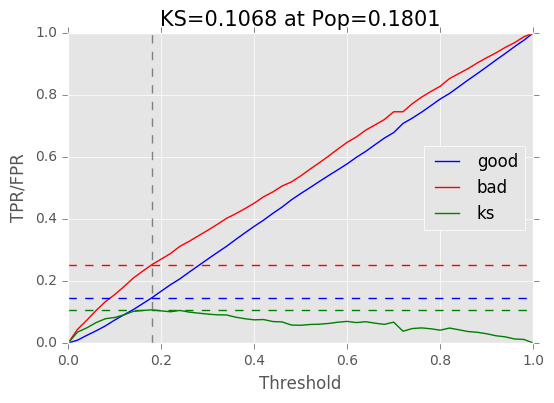

In [3]:
####################### PlotKS ##########################
def PlotKS(preds, labels, n, asc):
    
    # preds is score: asc=1
    # preds is prob: asc=0
    
    pred = preds  # 预测值
    bad = labels  # 取1为bad, 0为good
    ksds = pd.DataFrame({'bad': bad, 'pred': pred})
    ksds['good'] = 1 - ksds.bad
    
    if asc == 1:
        ksds1 = ksds.sort_values(by=['pred', 'bad'], ascending=[True, True])
    elif asc == 0:
        ksds1 = ksds.sort_values(by=['pred', 'bad'], ascending=[False, True])
    ksds1.index = range(len(ksds1.pred))
    ksds1['cumsum_good1'] = 1.0*ksds1.good.cumsum()/sum(ksds1.good)
    ksds1['cumsum_bad1'] = 1.0*ksds1.bad.cumsum()/sum(ksds1.bad)
    
    if asc == 1:
        ksds2 = ksds.sort_values(by=['pred', 'bad'], ascending=[True, False])
    elif asc == 0:
        ksds2 = ksds.sort_values(by=['pred', 'bad'], ascending=[False, False])
    ksds2.index = range(len(ksds2.pred))
    ksds2['cumsum_good2'] = 1.0*ksds2.good.cumsum()/sum(ksds2.good)
    ksds2['cumsum_bad2'] = 1.0*ksds2.bad.cumsum()/sum(ksds2.bad)
    
    # ksds1 ksds2 -> average
    ksds = ksds1[['cumsum_good1', 'cumsum_bad1']]
    ksds['cumsum_good2'] = ksds2['cumsum_good2']
    ksds['cumsum_bad2'] = ksds2['cumsum_bad2']
    ksds['cumsum_good'] = (ksds['cumsum_good1'] + ksds['cumsum_good2'])/2
    ksds['cumsum_bad'] = (ksds['cumsum_bad1'] + ksds['cumsum_bad2'])/2
    
    # ks
    ksds['ks'] = abs(ksds['cumsum_bad'] - ksds['cumsum_good'])
    ksds['tile0'] = range(1, len(ksds.ks) + 1)
    ksds['tile'] = 1.0*ksds['tile0']/len(ksds['tile0'])
    
    qe = list(np.arange(0, 1, 1.0/n))
    qe.append(1)
    qe = qe[1:]
    
    ks_index = pd.Series(ksds.index)
    ks_index = ks_index.quantile(q = qe)
    ks_index = np.ceil(ks_index).astype(int)
    ks_index = list(ks_index)
    
    ksds = ksds.loc[ks_index]
    ksds = ksds[['tile', 'cumsum_good', 'cumsum_bad', 'ks']]
    ksds0 = np.array([[0, 0, 0, 0]])
    ksds = np.concatenate([ksds0, ksds], axis=0)
    ksds = pd.DataFrame(ksds, columns=['tile', 'cumsum_good', 'cumsum_bad', 'ks'])
    
    ks_value = ksds.ks.max()
    ks_pop = ksds.tile[ksds.ks.idxmax()]
    print ('ks_value is ' + str(np.round(ks_value, 4)) + ' at pop = ' + str(np.round(ks_pop, 4)))
    
    # chart
    plt.plot(ksds.tile, ksds.cumsum_good, label='good',
                         color='blue', linestyle='-', linewidth=1)
                         
    plt.plot(ksds.tile, ksds.cumsum_bad, label='bad',
                        color='red', linestyle='-', linewidth=1)
                        
    plt.plot(ksds.tile, ksds.ks, label='ks',
                   color='green', linestyle='-', linewidth=1)
                       
    plt.axvline(ks_pop, color='gray', linestyle='--')
    plt.axhline(ks_value, color='green', linestyle='--')
    plt.axhline(ksds.loc[ksds.ks.idxmax(), 'cumsum_good'], color='blue', linestyle='--')
    plt.axhline(ksds.loc[ksds.ks.idxmax(),'cumsum_bad'], color='red', linestyle='--')
    plt.title('KS=%s ' %np.round(ks_value, 4) +  
                'at Pop=%s' %np.round(ks_pop, 4), fontsize=15)
    plt.xlabel('Threshold')
    plt.ylabel('TPR/FPR')
    plt.legend(loc='best')
    

    return ksds
####################### over ##########################

PlotKS(preds=data['score'], labels=data['target'], n=50, asc=1)

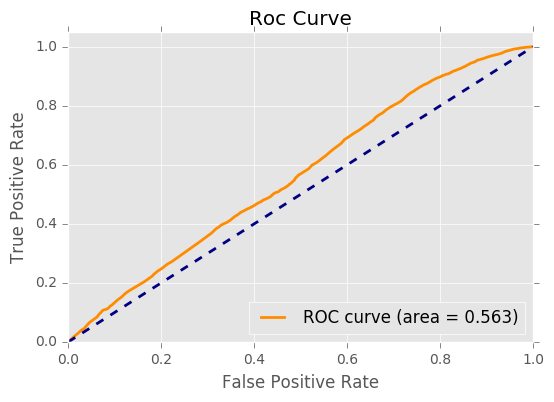

In [4]:
##################################
def PlotROC(preds, labels):
    y_pred = preds  # 预测值
    y_true = labels # 真实值，bad为1，good为0
    fpr,tpr,threshold = roc_curve(y_true, y_pred, pos_label=0) ###计算真正率和假正率
    roc_auc = auc(fpr,tpr) ###计算auc的值
    plt.figure()
    lw = 2
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Roc Curve')
    plt.legend(loc="lower right")
    plt.show()
##################################

PlotROC(preds = data['score'], labels = data['target'])